# Lab Assignment 1: Part 2 code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
from sklearn.datasets import load_digits
diabetes = load_digits()
X = diabetes.data
y = diabetes.target

In [3]:
# Check for number of output classes in the data
import numpy as np
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# # 80/20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [5]:
# Normalizing data

from sklearn.preprocessing import StandardScaler
import math

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
# Training data splits

_, ts1_X, _,  ts1_y= train_test_split(X_train_std,
                                      y_train, random_state=1, test_size=.25)
_, ts2_X, _,  ts2_y = train_test_split(X_train_std,
                                       y_train, random_state=1, test_size=.50)
_, ts3_X, _,  ts3_y = train_test_split(X_train_std,
                                       y_train, random_state=1, test_size=.75)
ts4_X = X_train_std
ts4_y = y_train

In [7]:
X_train_std_splits = [ts1_X, ts2_X, ts3_X, ts4_X]
y_train_std_splits = [ts1_y, ts2_y, ts3_y, ts4_y]

In [12]:
split_list = ['25%', '50%', "75%", "100%"]
epochs = [5:50:5]

SyntaxError: invalid syntax (Temp/ipykernel_10656/2616804896.py, line 2)

Train Split: 0
Time taken for 25% split batch : 0.4936182498931885


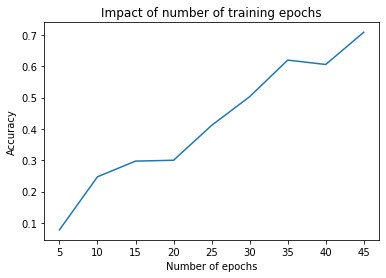

Train Split: 1
Time taken for 50% split batch : 1.2014031410217285


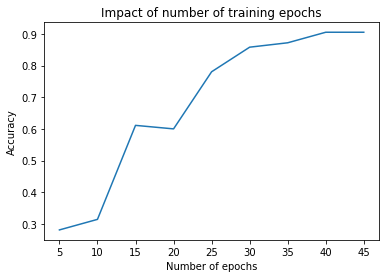

Train Split: 2
Time taken for 75% split batch : 1.5061919689178467


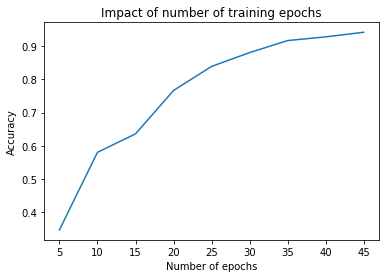

Train Split: 3
Time taken for 100% split batch : 2.082643747329712


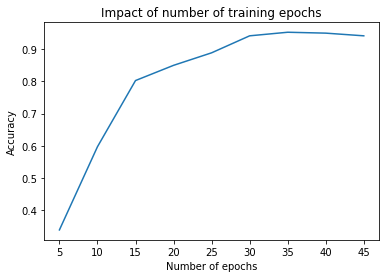

In [13]:
# Neural network training

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

for i in range(4):
    print(f"Train Split: {i}")
    accuracies = []
    num_epochs = []
    start_time = time.time()
    for epoch in range(5,50,5):
        
        mlp = MLPClassifier(max_iter=epoch, activation='relu',
                            hidden_layer_sizes=[20, 20, 20])
        mlp.fit(X_train_std_splits[i], y_train_std_splits[i])
        accuracies.append(mlp.score(X_test_std, y_test))
        num_epochs.append(epoch)
        
    end_time = time.time()
    duration = end_time - start_time
    print(f"Time taken for {split_list[i]} split batch : {duration}")
    plt.figure()
    plt.plot(num_epochs, accuracies)
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.title("Impact of number of training epochs")
    plt.show()